# Heart Disease Prediction

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [2]:
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
heart.shape

(303, 14)

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#No missing value

In [9]:
info = ["Age of the Person","Gender:- 1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure(in mm Hg)","cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina (1 = yes; 0 = no)","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

age:			Age of the Person
sex:			Gender:- 1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure(in mm Hg)
chol:			cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina (1 = yes; 0 = no)
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
# checking the distribution of target variable

heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Data Cleaning/ Data preprocessing

In [11]:
#Check duplicate rows in data
duplicate_rows = heart[heart.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (1, 14)


In [12]:
##we have one duplicate row.

In [13]:
#Removing the duplicate row
heart = heart.drop_duplicates()
duplicate_rows = heart[heart.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)
#Number of duplicate rows after dropping one duplicate row

Number of duplicate rows ::  (0, 14)


In [14]:
heart.shape

(302, 14)

In [15]:
#Looking for null values
print("Null values :: ")
print(heart.isnull() .sum())

Null values :: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [16]:
#No Null value found

In [17]:
#Detecting Outliers using box plot

Detecting Outliers using IQR (InterQuartile Range)

<AxesSubplot:xlabel='age'>

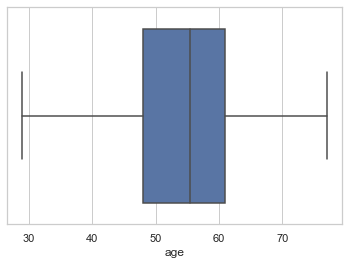

In [18]:
sns.boxplot(x=heart['age'])

#No Outliers observed in 'age'

<AxesSubplot:xlabel='sex'>

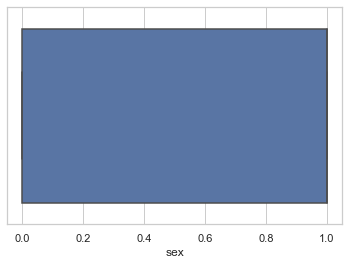

In [19]:
sns.boxplot(x=heart['sex'])

#No outliers observed in sex data

<AxesSubplot:xlabel='cp'>

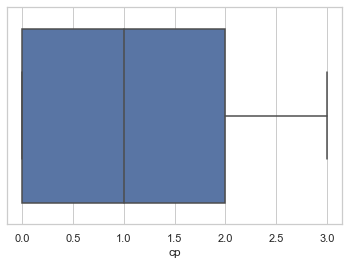

In [20]:
sns.boxplot(x=heart['cp'])

#No outliers in 'cp'

<AxesSubplot:xlabel='trestbps'>

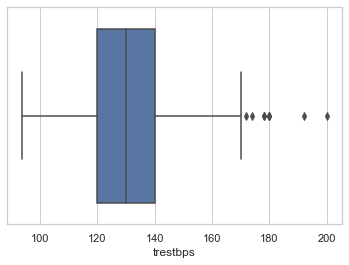

In [21]:
sns.boxplot(x=heart['trestbps'])

#Some outliers are observed in 'trestbps'. They will be removed later

<AxesSubplot:xlabel='chol'>

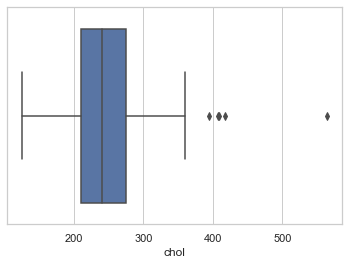

In [22]:
sns.boxplot(x=heart['chol'])

#Some outliers are observed in 'chol'. 

<AxesSubplot:xlabel='fbs'>

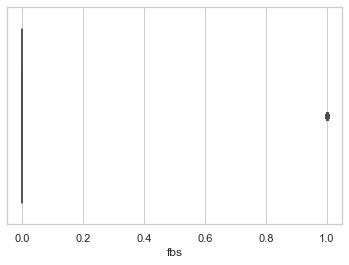

In [23]:
sns.boxplot(x=heart['fbs'])

<AxesSubplot:xlabel='restecg'>

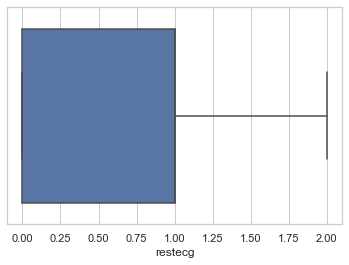

In [24]:
sns.boxplot(x=heart['restecg'])

<AxesSubplot:xlabel='thalach'>

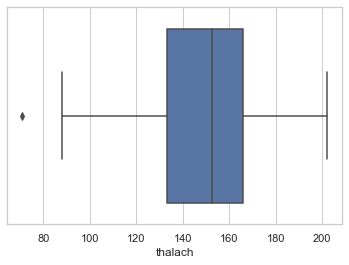

In [25]:
sns.boxplot(x=heart['thalach'])

#Outliers are present in 'thalach'

<AxesSubplot:xlabel='exang'>

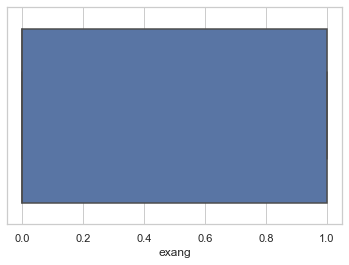

In [26]:
sns.boxplot(x=heart['exang'])

<AxesSubplot:xlabel='oldpeak'>

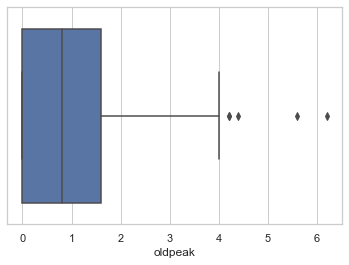

In [27]:
sns.boxplot(x=heart['oldpeak'])

#Outliers are present in 'OldPeak'

<AxesSubplot:xlabel='slope'>

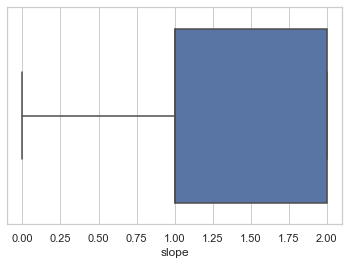

In [28]:
sns.boxplot(x=heart['slope'])

<AxesSubplot:xlabel='ca'>

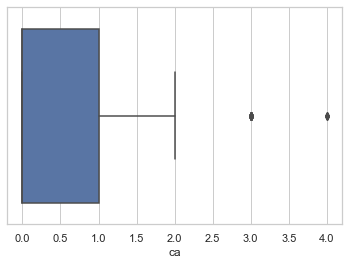

In [29]:
sns.boxplot(x=heart['ca'])

#Outliers are present in 'ca'

<AxesSubplot:xlabel='thal'>

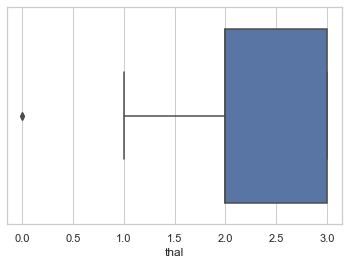

In [30]:
sns.boxplot(x=heart['thal'])

#Outliers are present in 'thal'

# Removing Outliers

In [31]:
#Removing Outlier using Inter-Quartile Range

In [32]:
#Find the InterQuartile Range
Q1 = heart.quantile(0.25)
Q3 = heart.quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)

*********** InterQuartile Range ***********
age         13.00
sex          1.00
cp           2.00
trestbps    20.00
chol        63.75
fbs          0.00
restecg      1.00
thalach     32.75
exang        1.00
oldpeak      1.60
slope        1.00
ca           1.00
thal         1.00
target       1.00
dtype: float64


In [33]:
# Remove the outliers using IQR
heart1 = heart[~((heart<(Q1-1.5*IQR))|(heart>(Q3+1.5*IQR))).any(axis=1)]
heart1.shape

(228, 14)

After removing outliers using IQR, the data contains 228 records.

In [34]:
#Removing outliers using Z-score

from scipy import stats

z = np.abs(stats.zscore(heart))
heart2 = heart[(z<3).all(axis=1)]
heart2.shape

(287, 14)

After using Z-score to detect and remove outliers, the number of records in the dataset is 287. 

As the number of records available is higher after Z-score, we will proceed with ‘heart2’

# EDA

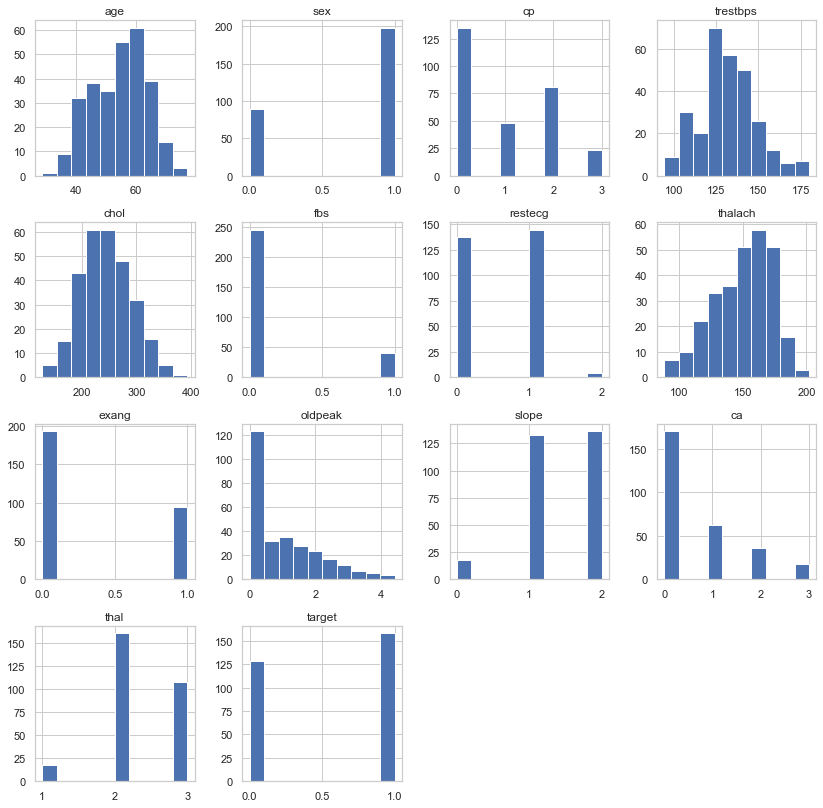

In [35]:
heart2.hist(figsize=(14,14))
plt.show()

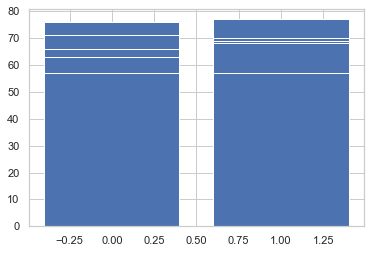

In [36]:
plt.bar(x=heart2['sex'],height=heart2['age'])
plt.show()

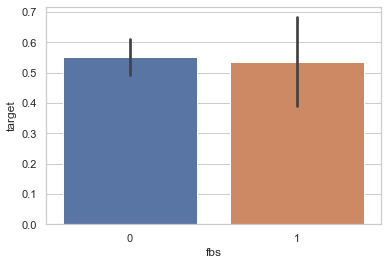

In [37]:
sns.barplot(x="fbs", y="target", data=heart2)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='age'>

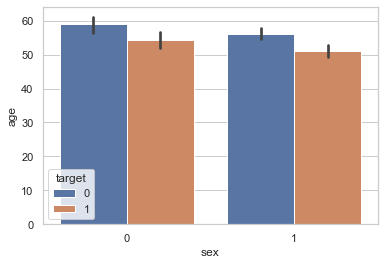

In [38]:
sns.barplot(x=heart2['sex'],y=heart2['age'],hue=heart2['target'])

F:\annaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='target'>

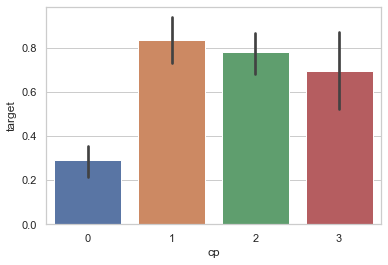

In [39]:
sns.barplot(heart2["cp"],heart2['target'])

F:\annaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='target'>

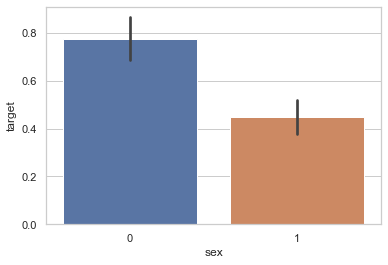

In [40]:
sns.barplot(heart2["sex"],heart2['target'])

F:\annaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thal', ylabel='Density'>

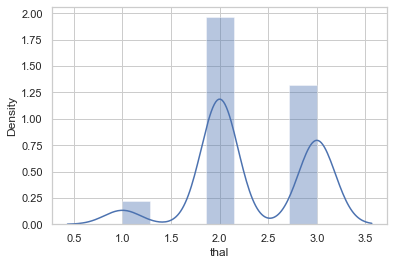

In [41]:
sns.distplot(heart2["thal"])

F:\annaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

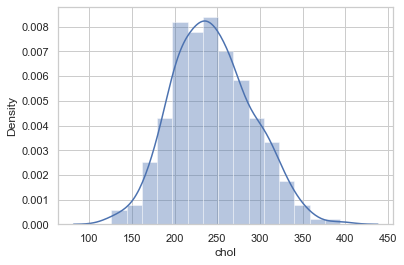

In [42]:
sns.distplot(heart2["chol"])

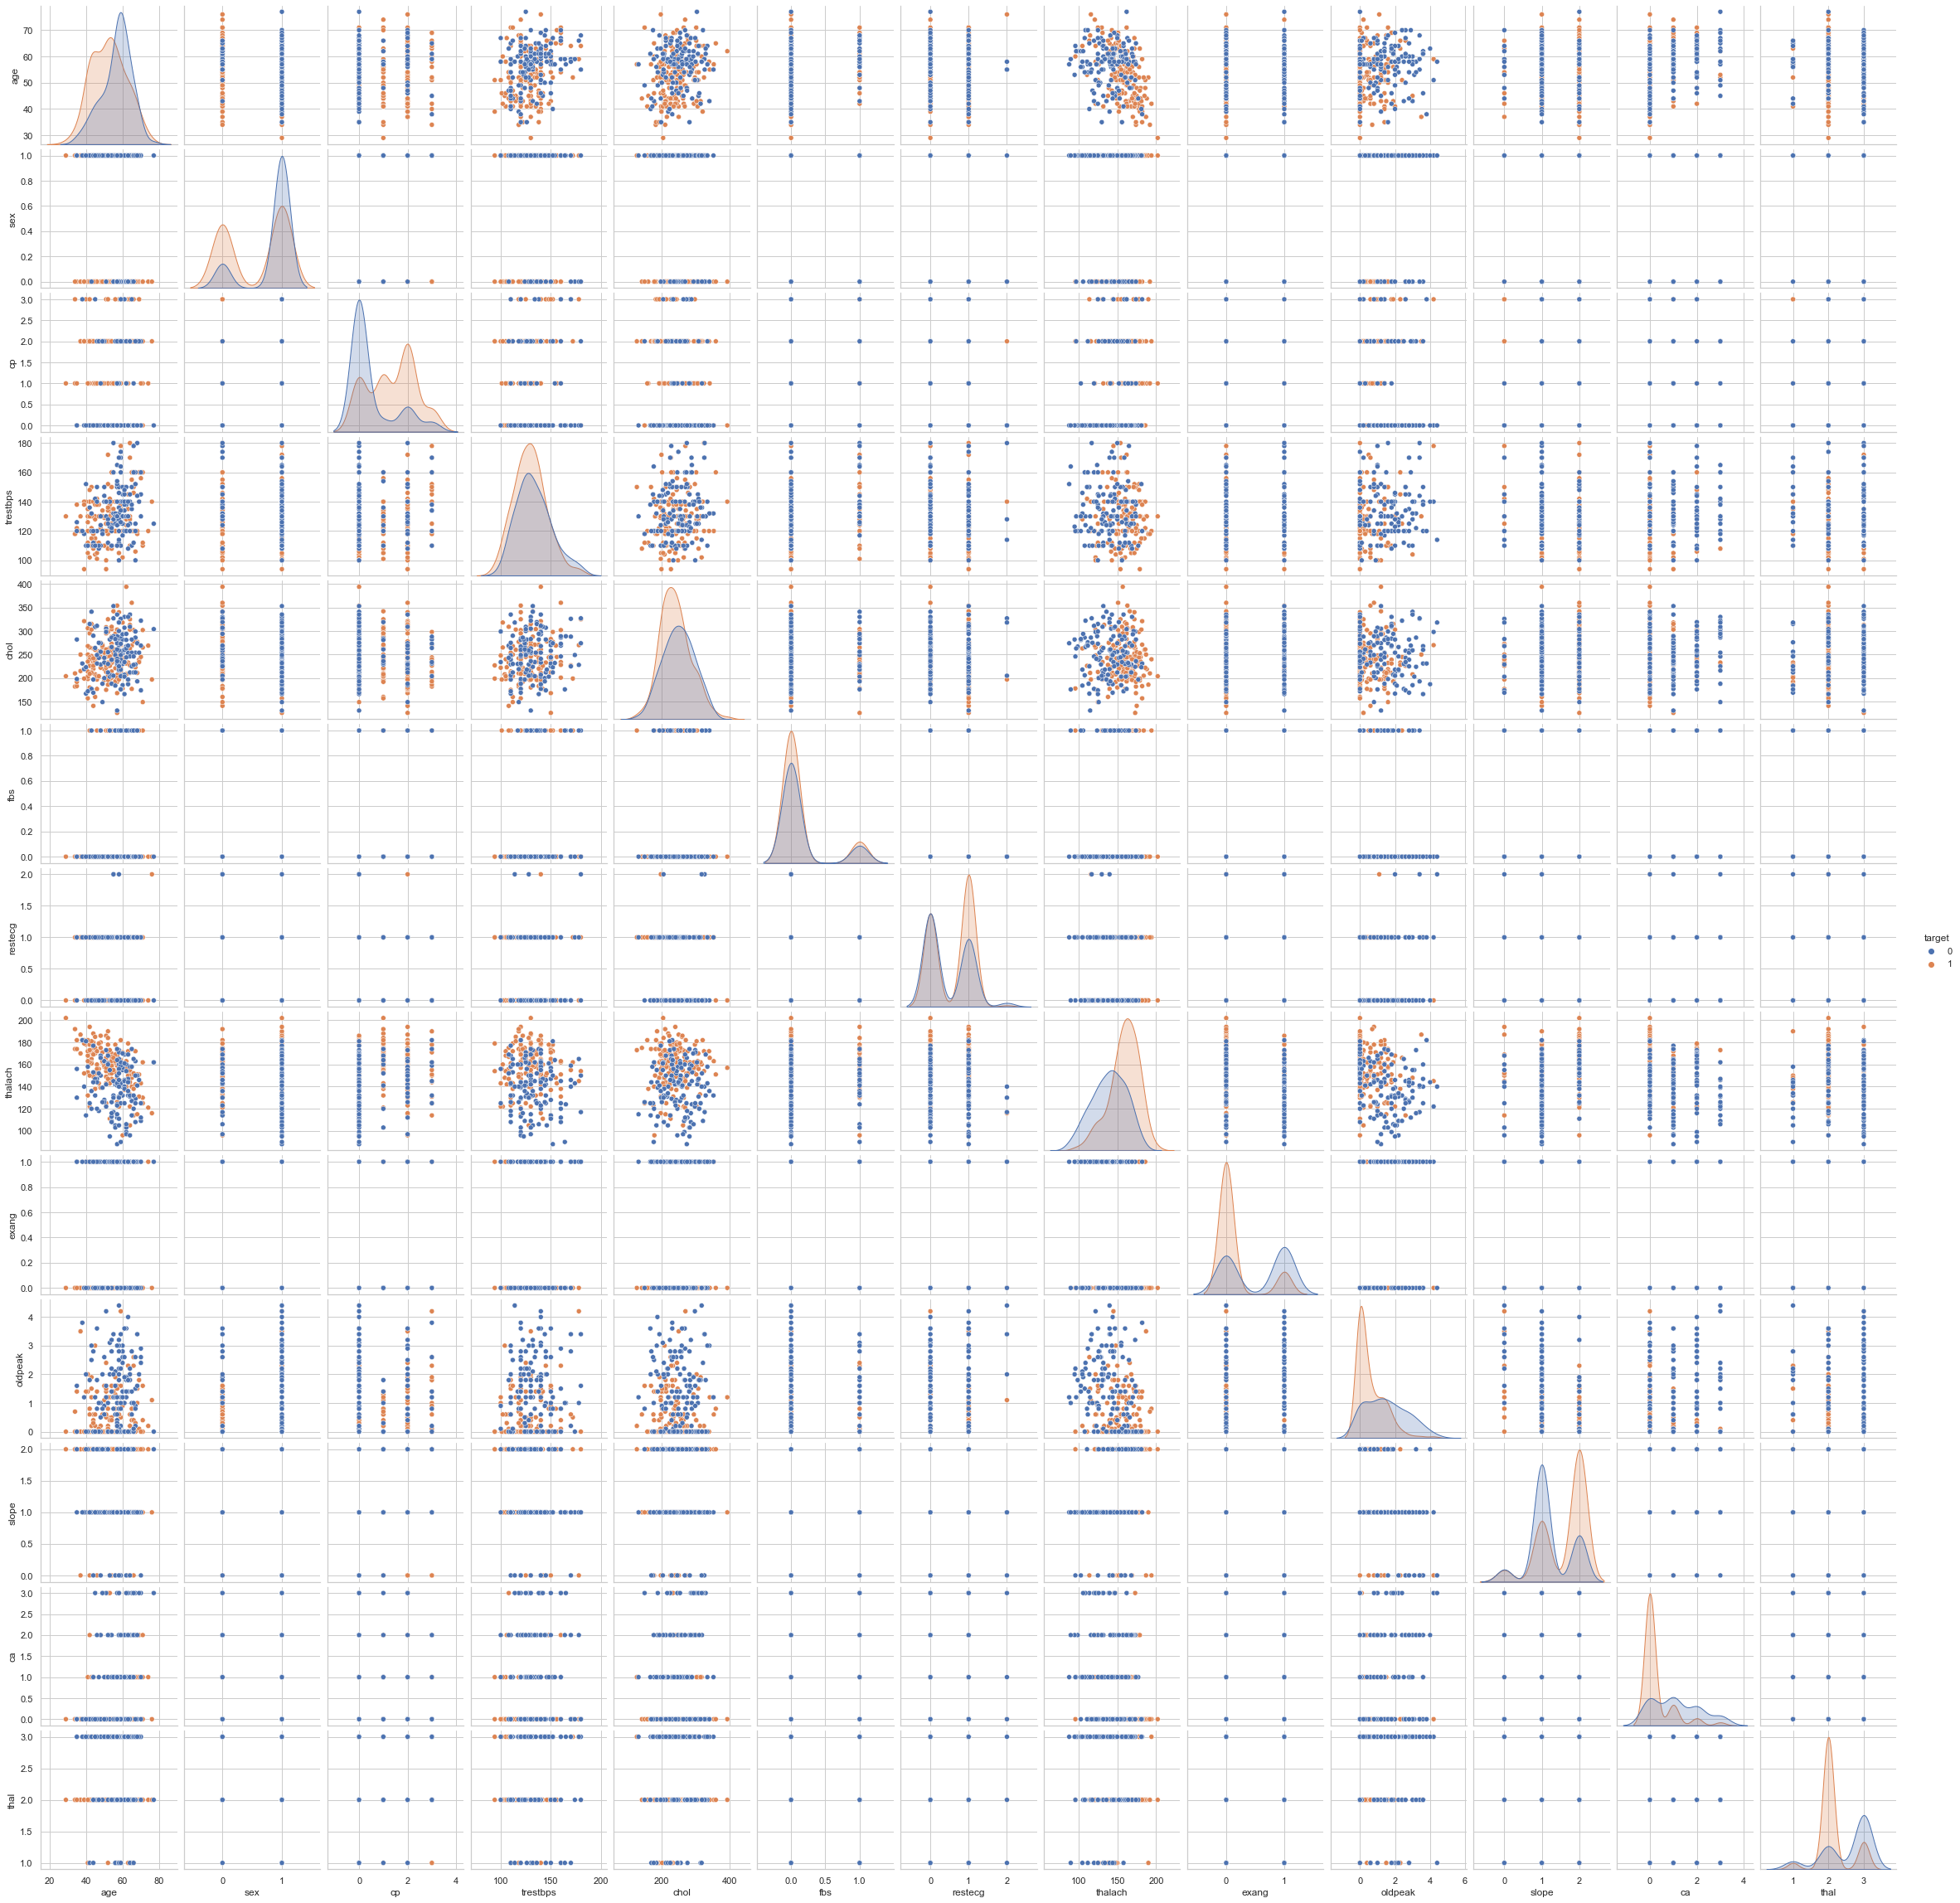

In [43]:
sns.pairplot(heart2,hue='target')

In [44]:
# checking the distribution of target variable

heart2['target'].value_counts()

1    158
0    129
Name: target, dtype: int64

1    158
0    129
Name: target, dtype: int64


F:\annaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


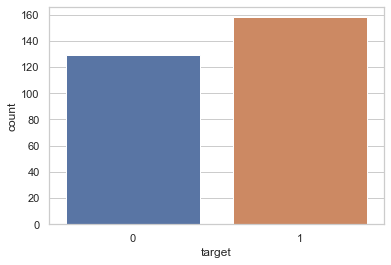

In [45]:
y = heart2["target"]

sns.countplot(y)


target_temp = heart2.target.value_counts()

print(target_temp)

1 = Heart Disease 0 = No Heart Disease

158 people in this data set have heart disease and 129 don't.

In [46]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']

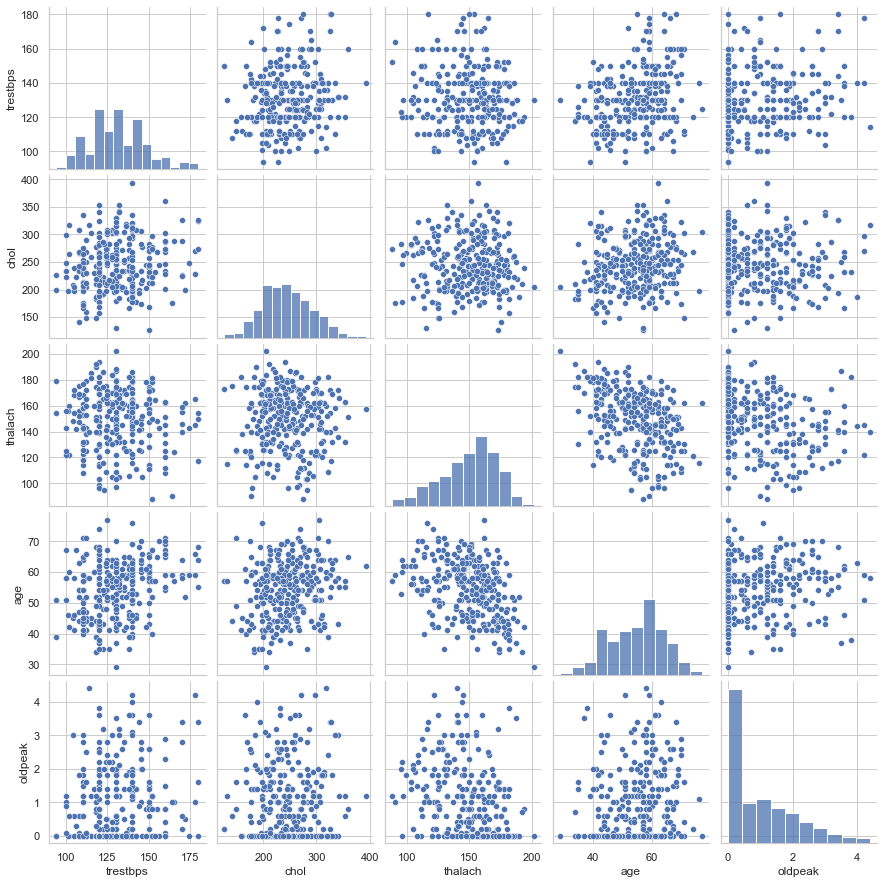

In [47]:
sns.pairplot(heart2[numeric_columns])

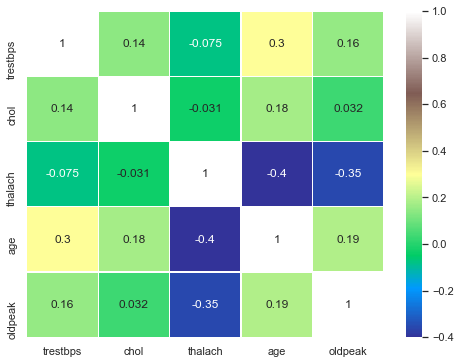

In [48]:
# create a correlation heatmap
sns.heatmap(heart2[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

F:\annaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\annaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\annaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

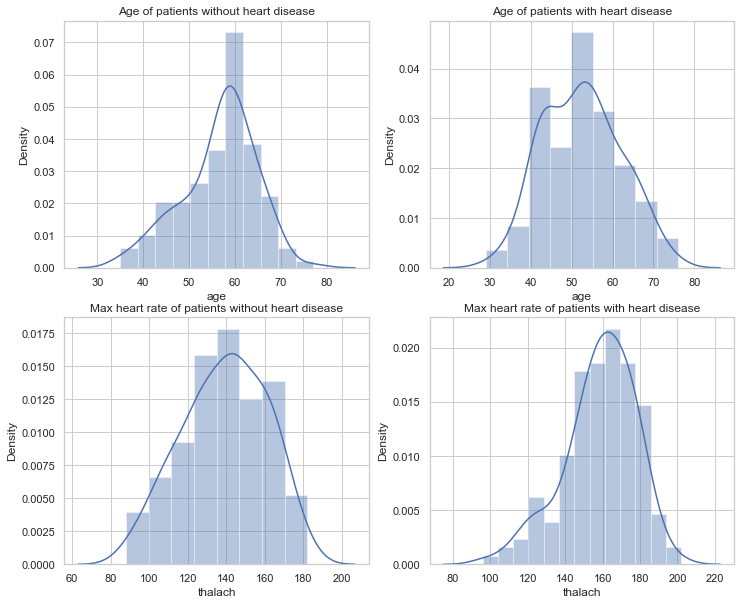

In [49]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart2[heart2['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart2[heart2['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart2[heart2['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart2[heart2['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

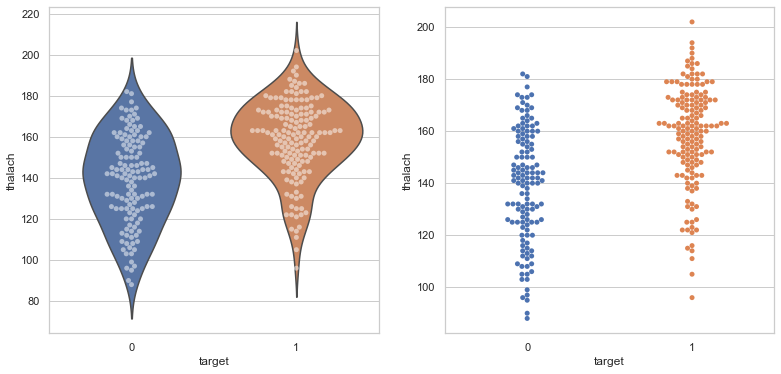

In [50]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=heart2, inner=None)
sns.swarmplot(x="target", y="thalach", data=heart2, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=heart2)
plt.show()

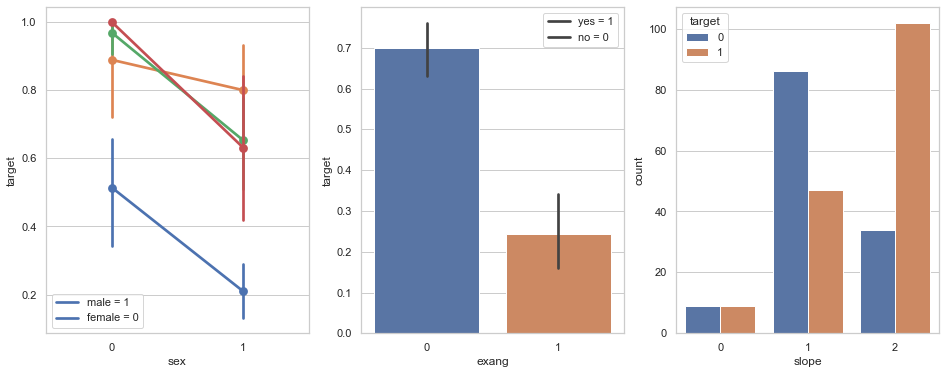

In [51]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='cp', data=heart2)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=heart2)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=heart2)
plt.show()

In [52]:
#Correlation Matrix

(14.5, -0.5)

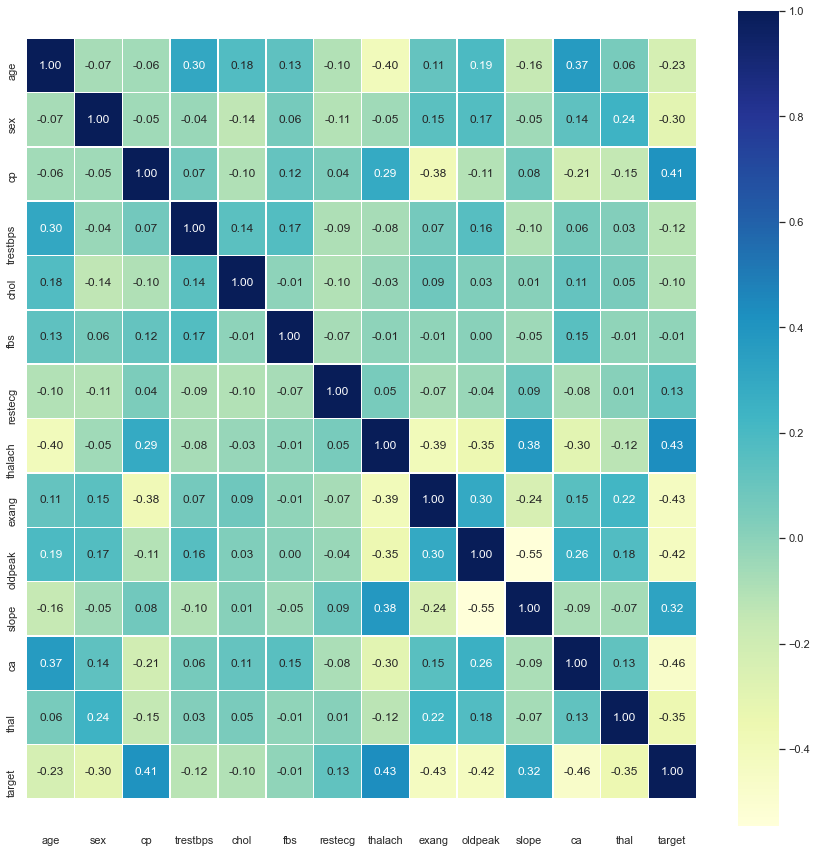

In [53]:
corr_matrix = heart2.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

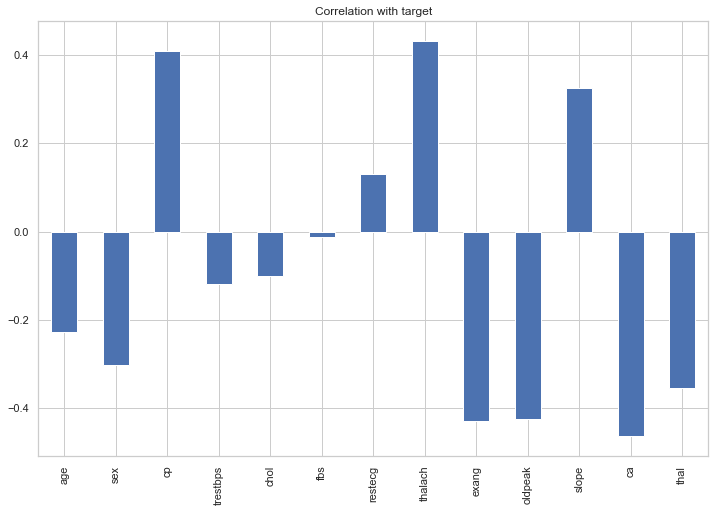

In [54]:
heart2.drop('target', axis=1).corrwith(heart2.target).plot(kind='bar', grid=True, figsize=(12, 8), 
title="Correlation with target")

fbs and chol are the lowest correlated with the target variable. All other variables have a significant correlation with the target variable.

# DATA Preprocessing¶

In [55]:
#Seperating people having heart disease and people that do not have heart disease

In [56]:
include = heart2[heart2['target'].values == 1]
exclude = heart2[heart2['target'].values != 1]
havedisease = include
print(havedisease)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
157   35    1   1       122   192    0        1      174      0      0.0   
159   56    1   1       130   221    0        0      163      0      0.0   
160   56    1   1       120   240    0        1      169      0      0.0   
161   55    0   1       132   342    0        1      166      0      1.2   
162   41    1   1       120   157    0        1      182      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

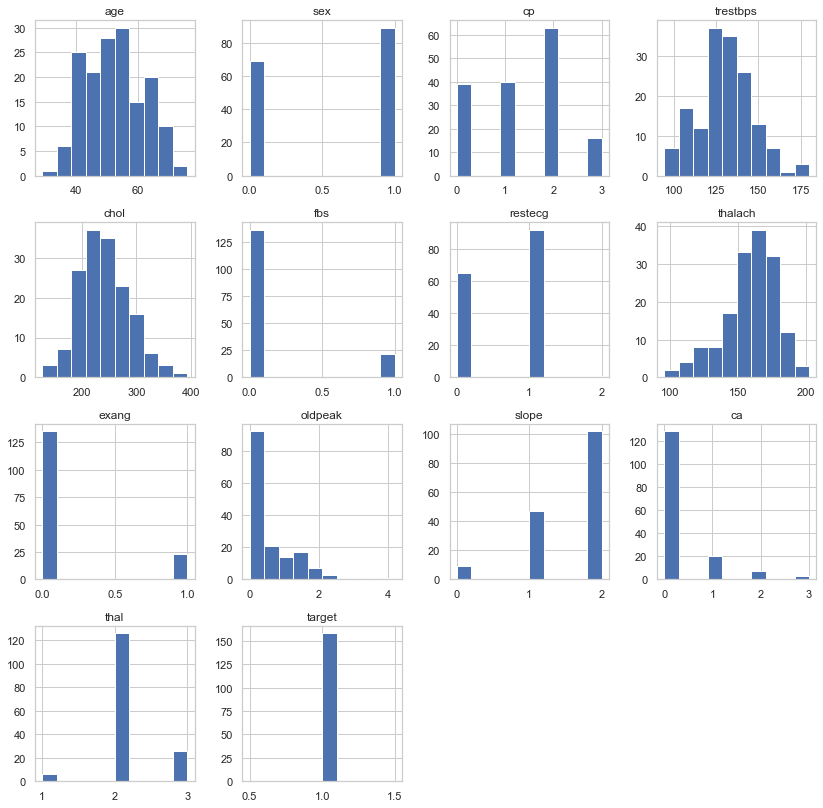

In [57]:
havedisease.hist(figsize=(14,14))
plt.show()

In [58]:
nothavedisease = exclude
print(nothavedisease)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
165   67    1   0       160   286    0        0      108      1      1.5   
166   67    1   0       120   229    0        0      129      1      2.6   
167   62    0   0       140   268    0        0      160      0      3.6   
168   63    1   0       130   254    0        0      147      0      1.4   
169   53    1   0       140   203    1        0      155      1      3.1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
165      1   3     2       0  
166      1   2     3     

In [59]:
# Analysising People with Heart Disease

In [60]:
#Analysising Age

In [61]:
age_max = havedisease.age.max()
print(age_max)

76


In [62]:
age_min = havedisease.age.min()
print(age_min)

29


In [63]:
age_med = havedisease.age.median()
print(age_med)

52.0


I was able to analyze their state of health by observing some of the variables in the dataframe. I started by looking at the age of the individuals and found the highest age was 76, the lowest age was 29, and the median age was 52.

In [64]:
# Analysing Resting Blood Preasure

In [65]:
bp_max = havedisease.trestbps.max()
print(bp_max)

180


In [66]:
bp_min = havedisease.trestbps.min()
print(bp_min)

94


In [67]:
bp_med = havedisease.trestbps.median()
print(bp_med)

130.0


A normal blood pressure level is less than 120/80 mmHg. I analyzed the systolic blood pressure of those individuals with heart disease and found the highest reading was 180, the lowest reading was 94, and the median reading was 130. The systolic reading should not go above 140, which is an indicator of high blood pressure.

In [68]:
# Analysing fbs

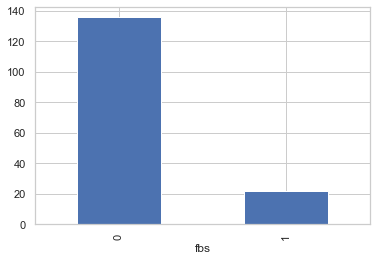

In [69]:
havedisease.groupby('fbs').target.count().plot.bar(ylim=0)
plt.show()

I looked at the blood sugar reading being greater than 120 and found that a small proportion of people had high blood sugar, which is indicative of diabetes.

In [70]:
# Analysing exang

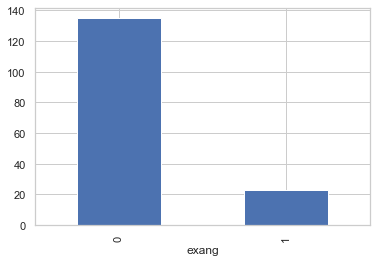

In [71]:
havedisease.groupby('exang').target.count().plot.bar(ylim=0)
plt.show()

Only a small percentage of people had exercise-induced angina

In [72]:
# Analysing cp

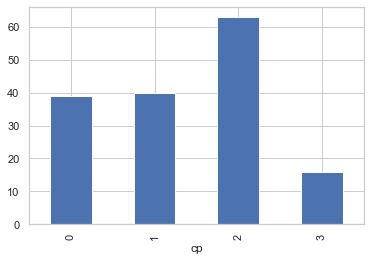

In [73]:
havedisease.groupby('cp').target.count().plot.bar(ylim=0)
plt.show()

I have analyse that majority people with heart disease have non-atypical angina type chest pain. And people with asymptomatic type chest pain are very less compaired to the other types.

In [74]:
# Analysing sex

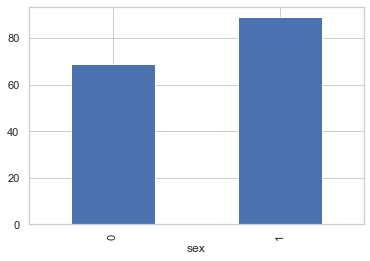

In [75]:
havedisease.groupby('sex').target.count().plot.bar(ylim=0)
plt.show()

There is not much difference between the ratio of male and female that have heart disease.

In [76]:
# Analysing chol

In [77]:
chol_max = havedisease.chol.max()
print(chol_max)

394


In [78]:
chol_min = havedisease.chol.min()
print(chol_min)

126


In [79]:
chol_med = havedisease.chol.median()
print(chol_med)

235.0


I analyzed the Total Cholesterol of those individuals with heart disease and found the highest reading was 394, the lowest reading was 126, and the median reading was 234.

In [80]:
# Analysing restecg

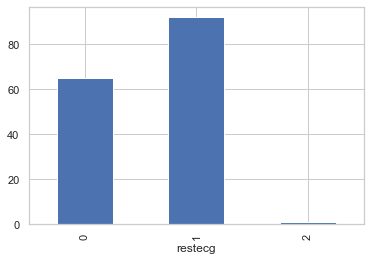

In [81]:
havedisease.groupby('restecg').target.count().plot.bar(ylim=0)
plt.show()

I analyzed that people with heart disease having resting electrocardiographic results(restecg) value = 2 are very less compaired with the other two.

In [82]:
# Analysing thalach (maximum heart rate achieved)

In [83]:
mhr_max = havedisease.thalach.max()
print(mhr_max)

202


In [84]:
mhr_min = havedisease.thalach.min()
print(mhr_min)

96


In [85]:
mhr_med = havedisease.thalach.median()
print(mhr_med)

161.5


I analyzed the maximum heart rate achieved of those individuals with heart disease and found the highest reading was 202, the lowest reading was 96, and the median reading was 161.5

In [86]:
# Analysing oldpeak

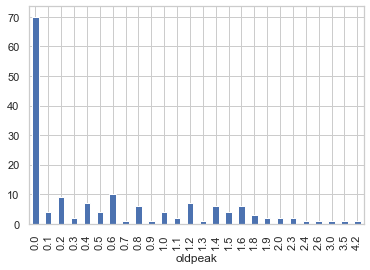

In [87]:
havedisease.groupby('oldpeak').target.count().plot.bar(ylim=0)
plt.show()

I analysed ST depression induced by exercise relative to rest of people that have heart disease and found that most people have 0 ST depression induced by exercise relative to rest

In [88]:
# Analysing slope

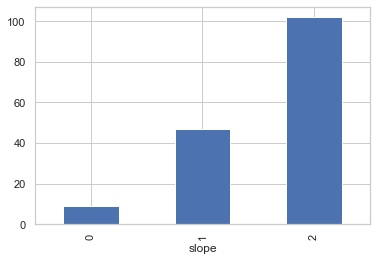

In [89]:
havedisease.groupby('slope').target.count().plot.bar(ylim=0)
plt.show()

I analysed the slope of the peak exercise ST segment of people that have heart disease and found that most people have value = 2 and least people have value =0

# Train Test split

In [90]:
x = heart2.drop(columns='target', axis=1)
y = heart2['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [91]:
print(x.shape, x_train.shape, x_test.shape)

(287, 13) (200, 13) (87, 13)


In [92]:
print(y.shape, y_train.shape, y_test.shape)

(287,) (200,) (87,)


In [93]:
Catagory=['You do not have Heart Disease....','Yes you have Heart Disease....RIP in Advance']

# DecisionTreeClassifier

In [94]:
from sklearn.tree import DecisionTreeClassifier


dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
prediction=dt.predict(x_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [96]:
accuracy_dt

74.71264367816092

In [97]:
print("Accuracy on training set: {:.3f}".format(dt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.747


In [98]:
prediction

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1],
      dtype=int64)

In [99]:
X_DT=np.array([[60,0,3,150,240,0,1,171,0,0.9,2,0,2]])
X_DT_prediction=dt.predict(X_DT)

In [100]:
X_DT_prediction[0]
print(Catagory[int(X_DT_prediction[0])])

Yes you have Heart Disease....RIP in Advance


In [101]:
#feature importance

In [102]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.04931271 0.01506485 0.2914709  0.08879156 0.04783965 0.
 0.         0.12151475 0.02667734 0.07844299 0.0120048  0.12502022
 0.14386024]


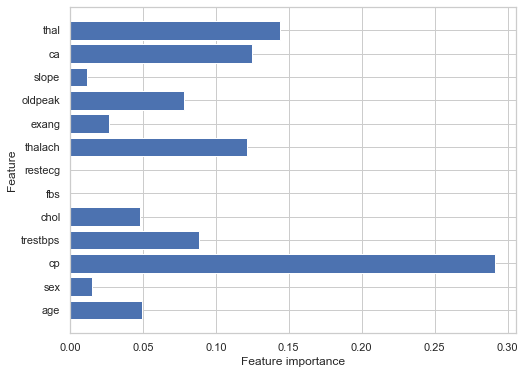

In [103]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')

# LogisticRegressionClassifier

In [104]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

F:\annaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
lrprediction=lr.predict(x_test)
accuracy_lr=accuracy_score(y_test,lrprediction)*100

In [106]:
accuracy_lr

85.0574712643678

In [107]:
print("Accuracy on training set: {:.4f}".format(lr.score(x_train, y_train)))
print("Accuracy on test set: {:.4f}".format(lr.score(x_test, y_test)))

Accuracy on training set: 0.8850
Accuracy on test set: 0.8506


In [108]:
lrprediction

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
      dtype=int64)

In [109]:
X_LR=np.array([[67,1,0,160,286,0,0,108,1,1.5,1,3,2]])
X_LR_lrprediction=dt.predict(X_LR)

In [110]:
X_LR_lrprediction[0]
print(Catagory[int(X_LR_lrprediction[0])])

You do not have Heart Disease....


# Conclusion

In [111]:
#Models and their accuracy

In [112]:
print("Decision Tree :: ", accuracy_score(y_test,prediction)*100)
print("Logistic Regression Classifier :: ", accuracy_score(y_test,lrprediction)*100)

Decision Tree ::  74.71264367816092
Logistic Regression Classifier ::  85.0574712643678


In [113]:
algorithms=['Decision Tree','LogisticRegression']
scores=[accuracy_dt,accuracy_lr]

F:\annaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

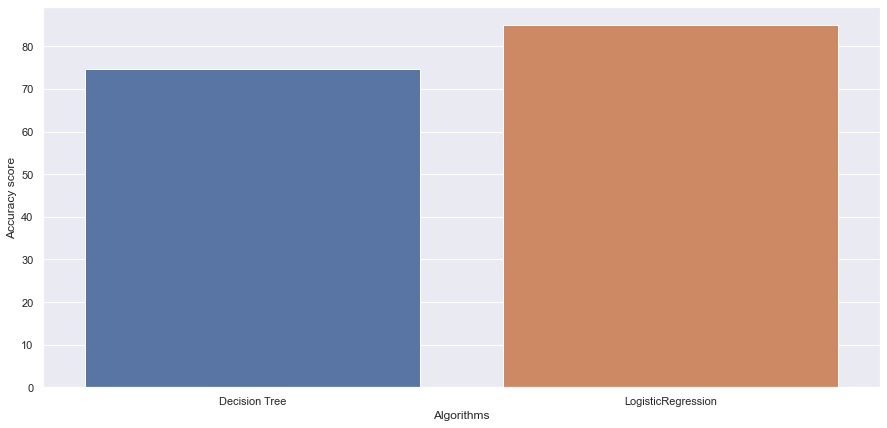

In [114]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)